In [ ]:
# !pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   --- ------------------------------------ 11.3/124.9 MB 58.9 MB/s eta 0:00:02
   ------- -------------------------------- 22.5/124.9 MB 57.0 MB/s eta 0:00:02
   --------- ------------------------------ 30.9/124.9 MB 50.4 MB/s eta 0:00:02
   ------------ --------------------------- 38.8/124.9 MB 46.5 MB/s eta 0:00:02
   ---------------- ----------------------- 50.1/124.9 MB 48.3 MB/s eta 0:00:02
   -------------------- ------------------- 63.7/124.9 MB 50.8 MB/s eta 0:00:02
   ------------------------ --------------- 76.3/124.9 MB 51.8 MB/s eta 0:00:01
   -------------------------- ------------- 84.1/124.9 MB 49.7 MB/s eta 0:00:01
   ----------------------------- ---------- 93.1/124.9 MB 49.1 MB/s eta 0:00:01
   -------------------------------- ------ 103.8/124.9 MB 49.1 MB/s eta 0:00:01
   ----------------------------------- --- 112.7/124.9 MB 48.3 MB/s eta 0:00:01
   ------------------------------------- - 120.1/

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/user_gender_encoded.csv')
df

,msno,city,bd,gender,registered_via,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,...,registration_init_time_day,membership_expire_date_year,membership_expire_date_month,membership_expire_date_day,log_end_year,log_end_month,log_end_day,log_start_year,log_start_month,log_start_day
0,6597367,4,30,1,9,0,0,603,2980,3129,...,16,2017,5,17,2017,3,31,2015,2,9
1,3629318,5,34,1,9,1,0,360,1072,1072,...,16,2017,8,23,2017,3,30,2016,8,22
2,2120253,13,63,1,9,0,0,783,3874,4023,...,18,2017,4,26,2017,3,30,2015,1,3
3,2836580,1,0,1,7,1,0,780,3874,4023,...,18,2017,4,27,2017,3,28,2015,1,1
4,661240,4,28,0,9,0,0,270,1589,1738,...,20,2017,4,2,2017,3,31,2015,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856561,4441402,1,0,1,7,0,0,540,1782,1782,...,20,2017,4,19,2017,3,31,2015,10,20
856562,2788470,1,0,1,7,0,0,540,2682,2682,...,20,2017,4,20,2017,3,31,2015,10,20
856563,2755294,1,0,1,7,0,0,540,1782,1782,...,20,2017,4,20,2017,3,31,2015,10,23
856564,6133792,6,26,0,7,0,0,570,2681,2532,...,20,2017,4,8,2017,3,31,2015,10,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856566 entries, 0 to 856565
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   msno                          856566 non-null  int64  
 1   city                          856566 non-null  int64  
 2   bd                            856566 non-null  int64  
 3   gender                        856566 non-null  int64  
 4   registered_via                856566 non-null  int64  
 5   is_churn                      856566 non-null  int64  
 6   is_back                       856566 non-null  int64  
 7   payment_plan_sum              856566 non-null  int64  
 8   plan_list_price               856566 non-null  int64  
 9   actual_amount_paid            856566 non-null  int64  
 10  discount_rate                 856566 non-null  float64
 11  is_auto_renew                 856566 non-null  float64
 12  is_cancel                     856566 non-nul

In [7]:
df.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via', 'is_churn', 'is_back',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'membership_expire_date_year', 'membership_expire_date_month',
       'membership_expire_date_day', 'log_end_year', 'log_end_month',
       'log_end_day', 'log_start_year', 'log_start_month', 'log_start_day'],
      dtype='object')

## Correlation

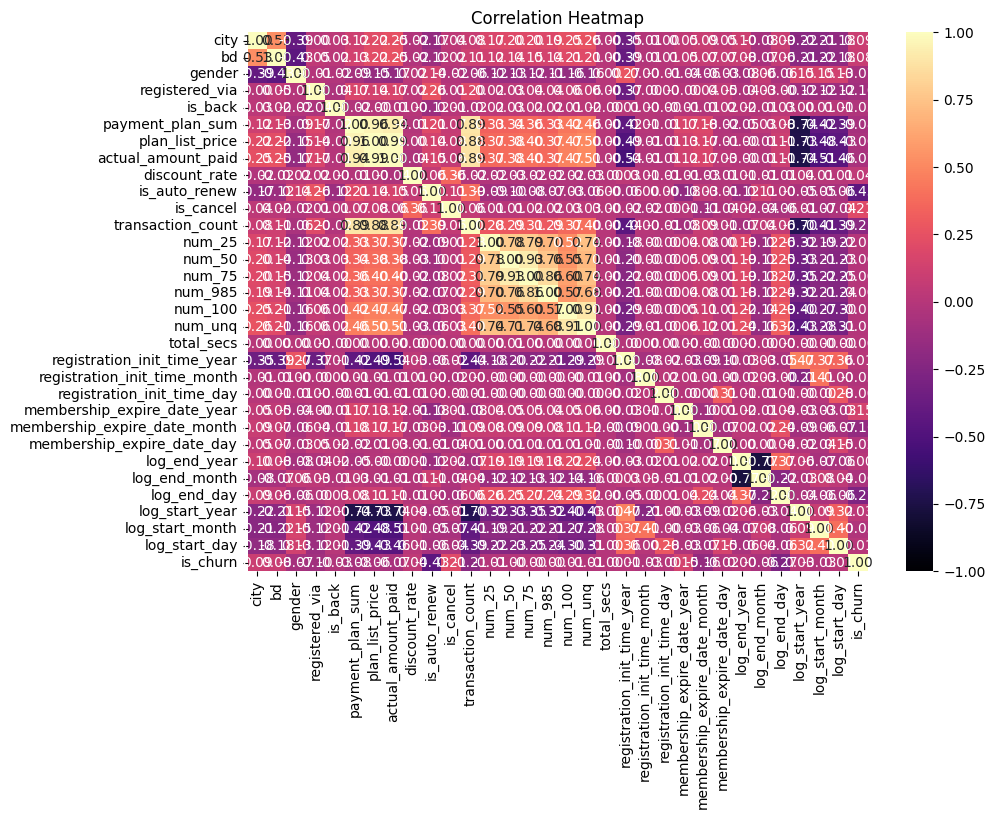

In [8]:
cols_to_check = ['city', 'bd', 'gender', 'registered_via', 'is_back',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'membership_expire_date_year', 'membership_expire_date_month',
       'membership_expire_date_day', 'log_end_year', 'log_end_month',
       'log_end_day', 'log_start_year', 'log_start_month', 'log_start_day', 'is_churn']
df_corr = df[cols_to_check]

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
print(corr_matrix)

                                  city        bd    gender  registered_via  \
city                          1.000000  0.527563 -0.393949        0.002099   
bd                            0.527563  1.000000 -0.430562        0.047421   
gender                       -0.393949 -0.430562  1.000000       -0.006521   
registered_via                0.002099  0.047421 -0.006521        1.000000   
is_back                       0.025786  0.016322 -0.019597       -0.039916   
payment_plan_sum              0.116862  0.133928 -0.085367        0.172152   
plan_list_price               0.218221  0.219862 -0.152173        0.144011   
actual_amount_paid            0.247024  0.254771 -0.168788        0.170185   
discount_rate                -0.020962 -0.021479  0.018441        0.024615   
is_auto_renew                -0.171369 -0.121565  0.138188        0.262591   
is_cancel                     0.036507  0.020165 -0.019790        0.008959   
transaction_count             0.082305  0.111562 -0.055439      

`is_churn` 과의 상관관계가 0.3, -0.3 이상인 컬럼들 추리기

In [11]:
is_churn_corr = corr_matrix["is_churn"]
high_corr_with_churn = is_churn_corr[(is_churn_corr >= 0.3) | (is_churn_corr >= -0.3)]
high_corr_with_churn

city                            0.094210
bd                              0.079836
gender                         -0.073418
registered_via                 -0.101279
is_back                        -0.028000
payment_plan_sum               -0.076570
plan_list_price                -0.061595
actual_amount_paid             -0.069914
discount_rate                   0.041105
is_cancel                       0.209267
transaction_count              -0.207082
num_25                         -0.005017
num_50                         -0.000447
num_75                         -0.004510
num_985                        -0.004487
num_100                        -0.014981
num_unq                        -0.011312
total_secs                     -0.000585
registration_init_time_year     0.006321
registration_init_time_month   -0.025195
registration_init_time_day     -0.002527
membership_expire_date_year     0.146748
membership_expire_date_month   -0.164550
membership_expire_date_day     -0.021474
log_end_year    

In [14]:
pd.DataFrame(high_corr_with_churn).index

Index(['city', 'bd', 'gender', 'registered_via', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate', 'is_cancel',
       'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'membership_expire_date_year', 'membership_expire_date_month',
       'membership_expire_date_day', 'log_end_year', 'log_end_month',
       'log_end_day', 'log_start_year', 'log_start_month', 'log_start_day',
       'is_churn'],
      dtype='object')

## Model Train - 사용할 컬럼

**Features**
- city
- bd
- gender
- registered_via
- is_back 
- payment_plan_sum
- plan_list_price
- actual_amount_paid
- discount_rate
- is_cancel
- transaction_count
- num_25
- num_50 
- num_75
- num_985
- num_100
- num_unq
- total_secs
- registration_init_time_year
- registration_init_time_month
- registration_init_time_day
- membership_expire_date_year 
- membership_expire_date_month
- membership_expire_date_day
- log_end_year 
- log_end_month
- log_end_day
- log_start_year
- log_start_month
- log_start_day

**label**
- 'is_churn'



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 평가 함수 정의
def evaluate_model(y_test, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    print(f"📌 {model_name} 성능 평가:")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"AUC Score : {auc:.4f}")
    print("-" * 40)

In [15]:
from sklearn.model_selection import train_test_split

X = df[['city', 'bd', 'gender', 'registered_via', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate', 'is_cancel',
       'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'membership_expire_date_year', 'membership_expire_date_month',
       'membership_expire_date_day', 'log_end_year', 'log_end_month',
       'log_end_day', 'log_start_year', 'log_start_month', 'log_start_day']]
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((685252, 30), (171314, 30), (685252,), (171314,))

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

# train
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

xgb_y_pred = xgb_model.predict(X_test)

[0]	validation_0-logloss:0.26456	validation_1-logloss:0.26544
[1]	validation_0-logloss:0.21965	validation_1-logloss:0.22081
[2]	validation_0-logloss:0.19198	validation_1-logloss:0.19338
[3]	validation_0-logloss:0.17369	validation_1-logloss:0.17529
[4]	validation_0-logloss:0.16019	validation_1-logloss:0.16194
[5]	validation_0-logloss:0.15116	validation_1-logloss:0.15301
[6]	validation_0-logloss:0.14527	validation_1-logloss:0.14726
[7]	validation_0-logloss:0.13856	validation_1-logloss:0.14061
[8]	validation_0-logloss:0.13457	validation_1-logloss:0.13680
[9]	validation_0-logloss:0.13215	validation_1-logloss:0.13447
[10]	validation_0-logloss:0.13023	validation_1-logloss:0.13261
[11]	validation_0-logloss:0.12678	validation_1-logloss:0.12912
[12]	validation_0-logloss:0.12533	validation_1-logloss:0.12776
[13]	validation_0-logloss:0.12457	validation_1-logloss:0.12706
[14]	validation_0-logloss:0.12395	validation_1-logloss:0.12645
[15]	validation_0-logloss:0.12314	validation_1-logloss:0.12573
[1

In [ ]:
from sklearn.model_selection import GridSearchCV
# 최적의 파라미터 찾기 - GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200, 300],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  
}

grid_search = GridSearchCV(
    estimator= XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42,),
    param_grid=param_grid,
    scoring='f1',
    cv=3,  
    verbose=1,
    n_jobs=-1  
)

# GridSearchCV 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f"🏆 최적의 하이퍼파라미터: {grid_search.best_params_}")

best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
🏆 최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [39]:
evaluate_model(y_test, xgb_y_pred, "XGBoost 기본 모델")
evaluate_model(y_test, y_pred_best, "XGBoost 최적의 파라미터 모델")

📌 XGBoost 기본 모델 성능 평가:
Accuracy  : 0.9603
Precision : 0.8927
Recall    : 0.7795
F1 Score  : 0.8323
AUC Score : 0.8830
----------------------------------------
📌 XGBoost 최적의 파라미터 모델 성능 평가:
Accuracy  : 0.9614
Precision : 0.8959
Recall    : 0.7855
F1 Score  : 0.8371
AUC Score : 0.8861
----------------------------------------


**Overfitting 여부**

Train 성능 vs Validation 성능

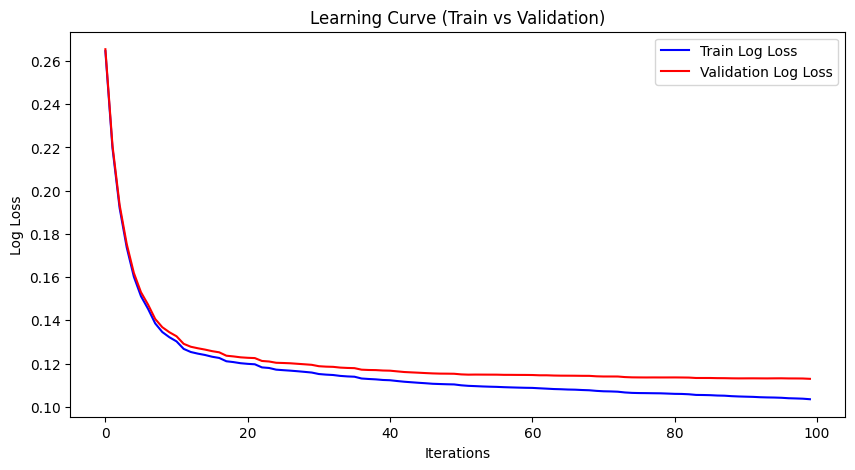

In [ ]:
results = xgb_model.evals_result()

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['logloss'], label="Train Log Loss", color='blue')
plt.plot(results['validation_1']['logloss'], label="Validation Log Loss", color='red')

plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Learning Curve (Train vs Validation)")
plt.legend()
plt.show()

교차검증

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores1 = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1')
print(f"(default param) Cross Validation F1 Score: {cv_scores1.mean():.4f} ± {cv_scores1.std():.4f}")

cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='f1')
print(f"(best param) Cross Validation F1 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

(default param) Cross Validation F1 Score: 0.8342 ± 0.0019
(best param) Cross Validation F1 Score: 0.8367 ± 0.0020


결론: 표준편차가 작으며, Train log loss와 validation log loss의 차이가 별반 다르지 않으므로 과적합이 없는 안정적인 모델이다.

**AUC & ROC Curve**

- 파란색 -- 선: 기본 모델의 ROC 곡선
- 빨간색 - 선: 최적화된 모델의 ROC 곡선
- 회색 -- 선: 랜덤 분류기 (AUC=0.5) 기준선

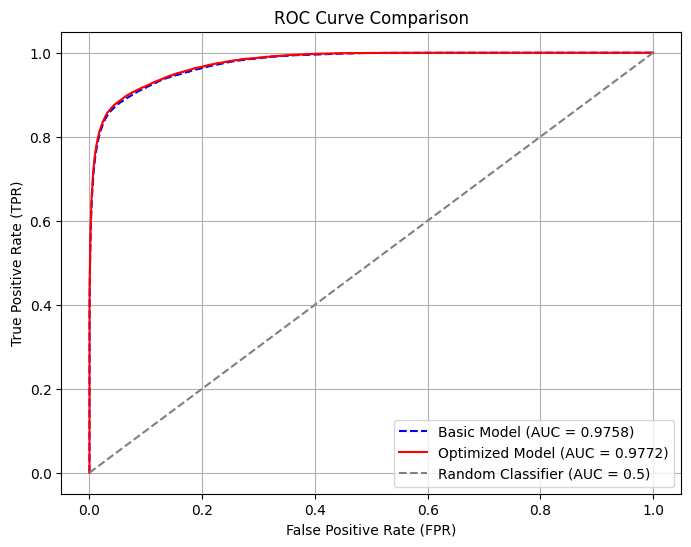

In [26]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 데이터 계산
y_probs_basic = xgb_model.predict_proba(X_test)[:, 1]  # 기본 모델 확률 예측값
y_probs_best = best_xgb.predict_proba(X_test)[:, 1]  # 최적 모델 확률 예측값

fpr_basic, tpr_basic, _ = roc_curve(y_test, y_probs_basic)
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best)

auc_basic = auc(fpr_basic, tpr_basic)
auc_best = auc(fpr_best, tpr_best)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, linestyle='--', color='blue', label=f"Basic Model (AUC = {auc_basic:.4f})")
plt.plot(fpr_best, tpr_best, linestyle='-', color='red', label=f"Optimized Model (AUC = {auc_best:.4f})")

# 랜덤 예측 기준선
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier (AUC = 0.5)")

# 그래프 설정
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

**Feature Importance**

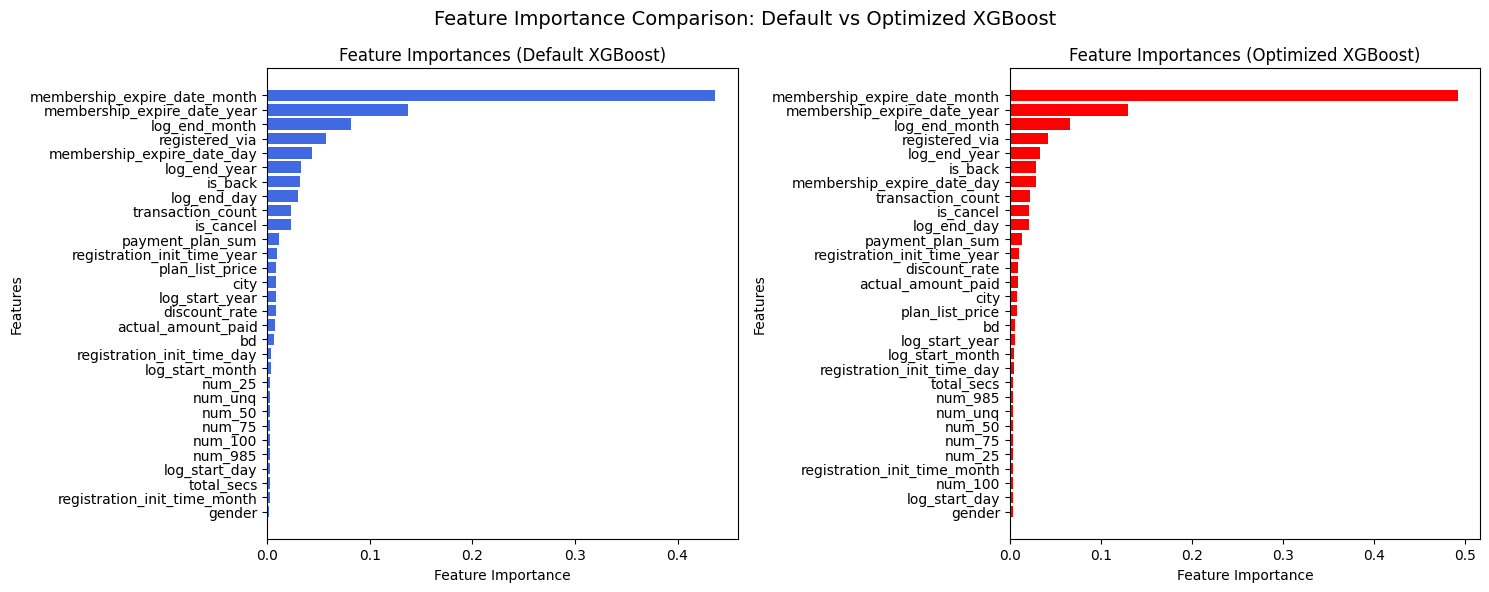

In [31]:
feature_importance_d = xgb_model.feature_importances_
feature_importance = best_xgb.feature_importances_
features = X_train.columns

sorted_idx_d = np.argsort(feature_importance_d)[::-1]
sorted_features_d = [features[i] for i in sorted_idx_d]
sorted_importance_d = feature_importance_d[sorted_idx_d]

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(sorted_features_d, sorted_importance_d, color='royalblue')
axes[0].set_title("Feature Importances (Default XGBoost)")
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Features")
axes[0].invert_yaxis()

# 시각화
axes[1].barh(sorted_features, sorted_importance, color='red')
axes[1].set_title("Feature Importances (Optimized XGBoost)")
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Features")
axes[1].invert_yaxis()

plt.suptitle("Feature Importance Comparison: Default vs Optimized XGBoost", fontsize=14)
plt.tight_layout()
plt.show()